# 1. **Fusion des tables en une seule**

## **Préparation des données**

## Données 2024 (1er semestre)

In [1]:
import pandas as pd

df_2024 = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/1dc47de2-b30a-4497-b9ef-448d054b5a4f',
                 sep='|',                # Séparateur |
                 encoding='latin-1',     # Encodage pour les caractères français
                 compression='zip',      # Spécifie que c'est un fichier zip
                 low_memory=False)       # Pour éviter les warnings de memory

df_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1566643 entries, 0 to 1566642
Data columns (total 43 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Identifiant de document     0 non-null        float64
 1   Reference document          0 non-null        float64
 2   1 Articles CGI              0 non-null        float64
 3   2 Articles CGI              0 non-null        float64
 4   3 Articles CGI              0 non-null        float64
 5   4 Articles CGI              0 non-null        float64
 6   5 Articles CGI              0 non-null        float64
 7   No disposition              1566643 non-null  int64  
 8   Date mutation               1566643 non-null  object 
 9   Nature mutation             1566643 non-null  object 
 10  Valeur fonciere             1549589 non-null  object 
 11  No voie                     946773 non-null   float64
 12  B/T/Q                       67087 non-null    object 
 1

In [2]:
df_2024.isnull().sum()

Identifiant de document       1566643
Reference document            1566643
1 Articles CGI                1566643
2 Articles CGI                1566643
3 Articles CGI                1566643
4 Articles CGI                1566643
5 Articles CGI                1566643
No disposition                      0
Date mutation                       0
Nature mutation                     0
Valeur fonciere                 17054
No voie                        619870
B/T/Q                         1499556
Type de voie                   653751
Code voie                        8201
Voie                             8232
Code postal                      8485
Commune                             0
Code departement                    0
Code commune                        0
Prefixe de section            1491406
Section                            46
No plan                             0
No Volume                     1563018
1er lot                       1102418
Surface Carrez du 1er lot     1431333
2eme lot    

In [ ]:
# modifier le nom des colonnes en rajoutznt un "underscore"
df_2024.columns = df_2024.columns.str.replace(' ', '_')

In [4]:
# filtrer sur le département de l'Ain
df_2024 = df_2024[df_2024['Code_departement'] == '01']
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18569 entries, 0 to 18568
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Identifiant_de_document     0 non-null      float64
 1   Reference_document          0 non-null      float64
 2   1_Articles_CGI              0 non-null      float64
 3   2_Articles_CGI              0 non-null      float64
 4   3_Articles_CGI              0 non-null      float64
 5   4_Articles_CGI              0 non-null      float64
 6   5_Articles_CGI              0 non-null      float64
 7   No_disposition              18569 non-null  int64  
 8   Date_mutation               18569 non-null  object 
 9   Nature_mutation             18569 non-null  object 
 10  Valeur_fonciere             18372 non-null  object 
 11  No_voie                     8259 non-null   float64
 12  B/T/Q                       487 non-null    object 
 13  Type_de_voie                7833 non

In [ ]:
# df_2024 = df_2024.drop(['Reference_document', '1_Articles_CGI', '2_Articles_CGI', '3_Articles_CGI', '4_Articles_CGI', '5_Articles_CGI', 'No_disposition','B/T/Q', 'Nature_culture_speciale', 
#                        'No_Volume', '1er_lot', '2eme_lot', '3eme_lot', '4eme_lot', '5eme_lot' , 'Prefixe_de_section', 'Identifiant_local'], axis=1)

## Données 2023 (Année complète)

In [6]:
df_2023 = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/dd516f7a-91bb-4cad-a63c-4b55cd457f4c',
                 sep='|',                # Séparateur |
                 encoding='latin-1',     # Encodage pour les caractères français
                 compression='zip',      # Spécifie que c'est un fichier zip
                 low_memory=False)       # Pour éviter les warnings de memory

df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799407 entries, 0 to 3799406
Data columns (total 43 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Identifiant de document     float64
 1   Reference document          float64
 2   1 Articles CGI              float64
 3   2 Articles CGI              float64
 4   3 Articles CGI              float64
 5   4 Articles CGI              float64
 6   5 Articles CGI              float64
 7   No disposition              int64  
 8   Date mutation               object 
 9   Nature mutation             object 
 10  Valeur fonciere             object 
 11  No voie                     float64
 12  B/T/Q                       object 
 13  Type de voie                object 
 14  Code voie                   object 
 15  Voie                        object 
 16  Code postal                 float64
 17  Commune                     object 
 18  Code departement            object 
 19  Code commune         

In [7]:
# modification des noms de colonne
# filtre sur le département de l'Ain
df_2023.columns = df_2023.columns.str.replace(' ', '_')
df_2023 = df_2023[df_2023['Code_departement'] == '01']
# df_2023 = df_2023.drop(['Reference_document', '1_Articles_CGI', '2_Articles_CGI', '3_Articles_CGI', '4_Articles_CGI', '5_Articles_CGI', 'No_disposition','B/T/Q', 'Nature_culture_speciale', 
#                        'No_Volume', '1er_lot', '2eme_lot', '3eme_lot', '4eme_lot', '5eme_lot' , 'Prefixe_de_section', 'Identifiant_local'], axis=1)
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44247 entries, 0 to 44246
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Identifiant_de_document     0 non-null      float64
 1   Reference_document          0 non-null      float64
 2   1_Articles_CGI              0 non-null      float64
 3   2_Articles_CGI              0 non-null      float64
 4   3_Articles_CGI              0 non-null      float64
 5   4_Articles_CGI              0 non-null      float64
 6   5_Articles_CGI              0 non-null      float64
 7   No_disposition              44247 non-null  int64  
 8   Date_mutation               44247 non-null  object 
 9   Nature_mutation             44247 non-null  object 
 10  Valeur_fonciere             44008 non-null  object 
 11  No_voie                     20701 non-null  float64
 12  B/T/Q                       1171 non-null   object 
 13  Type_de_voie                20086 no

## Données 2022 (Année complète)

In [8]:
df_2022 = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/91fd9f09-fe6f-4ab2-9803-84a626e1faa6',
                 sep='|',                # Séparateur |
                 encoding='latin-1',     # Encodage pour les caractères français
                 compression='zip',      # Spécifie que c'est un fichier zip
                 low_memory=False)       # Pour éviter les warnings de memory

df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4667090 entries, 0 to 4667089
Data columns (total 43 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Identifiant de document     float64
 1   Reference document          float64
 2   1 Articles CGI              float64
 3   2 Articles CGI              float64
 4   3 Articles CGI              float64
 5   4 Articles CGI              float64
 6   5 Articles CGI              float64
 7   No disposition              int64  
 8   Date mutation               object 
 9   Nature mutation             object 
 10  Valeur fonciere             object 
 11  No voie                     float64
 12  B/T/Q                       object 
 13  Type de voie                object 
 14  Code voie                   object 
 15  Voie                        object 
 16  Code postal                 float64
 17  Commune                     object 
 18  Code departement            object 
 19  Code commune         

In [9]:
# modification des noms de colonne
# filtre sur le département de l'Ain

df_2022.columns = df_2022.columns.str.replace(' ', '_')
df_2022 = df_2022[df_2022['Code_departement'] == '01']
# df_2022 = df_2022.drop(['Reference_document', '1_Articles_CGI', '2_Articles_CGI', '3_Articles_CGI', '4_Articles_CGI', '5_Articles_CGI', 'No_disposition','B/T/Q', 'Nature_culture_speciale', 
#                        'No_Volume', '1er_lot', '2eme_lot', '3eme_lot', '4eme_lot', '5eme_lot' , 'Prefixe_de_section', 'Identifiant_local'], axis=1)
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51150 entries, 0 to 51149
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Identifiant_de_document     0 non-null      float64
 1   Reference_document          0 non-null      float64
 2   1_Articles_CGI              0 non-null      float64
 3   2_Articles_CGI              0 non-null      float64
 4   3_Articles_CGI              0 non-null      float64
 5   4_Articles_CGI              0 non-null      float64
 6   5_Articles_CGI              0 non-null      float64
 7   No_disposition              51150 non-null  int64  
 8   Date_mutation               51150 non-null  object 
 9   Nature_mutation             51150 non-null  object 
 10  Valeur_fonciere             50963 non-null  object 
 11  No_voie                     25595 non-null  float64
 12  B/T/Q                       1607 non-null   object 
 13  Type_de_voie                24427 no

## Ajout de la colonne "Année" dans chaque table, puis fusion

In [26]:
# ajout de la colonne "Annee" dans chaque table
df_2022["Annee"] = 2022
df_2023["Annee"] = 2023
df_2024["Annee"] = 2024

# fusion des tables
df_concat = pd.concat([df_2022, df_2023, df_2024], ignore_index=True)
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113966 entries, 0 to 113965
Data columns (total 44 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Identifiant_de_document     0 non-null       float64
 1   Reference_document          0 non-null       float64
 2   1_Articles_CGI              0 non-null       float64
 3   2_Articles_CGI              0 non-null       float64
 4   3_Articles_CGI              0 non-null       float64
 5   4_Articles_CGI              0 non-null       float64
 6   5_Articles_CGI              0 non-null       float64
 7   No_disposition              113966 non-null  int64  
 8   Date_mutation               113966 non-null  object 
 9   Nature_mutation             113966 non-null  object 
 10  Valeur_fonciere             113343 non-null  object 
 11  No_voie                     54555 non-null   float64
 12  B/T/Q                       3265 non-null    object 
 13  Type_de_voie  

# 2. **Nettoyage des données**

In [28]:
# supprimer les colonnes non utiles pour l'analyse
# réorganiser les olonnes pour une meilleure lecture (données temporelles, géographiques, économiques,
# caractéristiques des biens, lots)
colonnes_a_supprimer = ['Identifiant_de_document', 'Reference_document', '1_Articles_CGI', '2_Articles_CGI', 
                        '3_Articles_CGI', '4_Articles_CGI', '5_Articles_CGI', 'No_disposition', 'No_voie', 
                        'B/T/Q', 'Type_de_voie', 'Code_voie', 'Voie', 'Prefixe_de_section', 'Section', 
                        'No_plan', 'No_Volume', '1er_lot', 'Code_type_local', 'Identifiant_local']

df_concat = df_concat.drop(columns=colonnes_a_supprimer, errors='ignore')  

nouvel_ordre_colonnes = ['Date_mutation', 'Annee', 'Commune', 'Code_postal', 'Code_commune',
                         'Valeur_fonciere', 'Nature_mutation', 'Type_local', 'Surface_reelle_bati', 'Nature_culture', 
                         'Nature_culture_speciale', 'Nombre_pieces_principales', 'Surface_terrain', 'Nombre_de_lots', 
                         'Surface_Carrez_du_1er_lot', 'Surface_Carrez_du_2eme_lot', 'Surface_Carrez_du_3eme_lot', 
                         'Surface_Carrez_du_4eme_lot', 'Surface_Carrez_du_5eme_lot']

df_concat = df_concat[nouvel_ordre_colonnes]

df_concat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113966 entries, 0 to 113965
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Date_mutation               113966 non-null  object 
 1   Annee                       113966 non-null  int64  
 2   Commune                     113966 non-null  object 
 3   Code_postal                 113337 non-null  float64
 4   Code_commune                113966 non-null  int64  
 5   Valeur_fonciere             113343 non-null  object 
 6   Nature_mutation             113966 non-null  object 
 7   Type_local                  54776 non-null   object 
 8   Surface_reelle_bati         54620 non-null   float64
 9   Nature_culture              84251 non-null   object 
 10  Nature_culture_speciale     2137 non-null    object 
 11  Nombre_pieces_principales   54620 non-null   float64
 12  Surface_terrain             84251 non-null   float64
 13  Nombre_de_lots

### Gestion des doublons

In [ ]:
# vérification des doublons
doublons = df_concat.duplicated().sum()
doublons

13797

In [30]:
# vérifier les doublons afin d'identifier les lignes à conserver ou pas
doublons = df_concat[df_concat.duplicated(keep=False)]
doublons

# constat : il existe de réels doublons identidentiques, on va donc conserver uniquement les 1ères lignes

,Date_mutation,Annee,Commune,Code_postal,Code_commune,Valeur_fonciere,Nature_mutation,Type_local,Surface_reelle_bati,Nature_culture,Nature_culture_speciale,Nombre_pieces_principales,Surface_terrain,Nombre_de_lots,Surface_Carrez_du_1er_lot,Surface_Carrez_du_2eme_lot,Surface_Carrez_du_3eme_lot,Surface_Carrez_du_4eme_lot,Surface_Carrez_du_5eme_lot
17,04/01/2022,2022,BOURG-EN-BRESSE,1000.0,53,"134000,00",Vente,DÃ©pendance,0.0,NaN,NaN,0.0,NaN,1,"70,02",NaN,NaN,NaN,NaN
19,04/01/2022,2022,BOURG-EN-BRESSE,1000.0,53,"134000,00",Vente,DÃ©pendance,0.0,NaN,NaN,0.0,NaN,1,"70,02",NaN,NaN,NaN,NaN
21,10/01/2022,2022,AMBRONAY,1500.0,7,"580000,00",Vente,DÃ©pendance,0.0,S,NaN,0.0,496.0,0,NaN,NaN,NaN,NaN,NaN
22,10/01/2022,2022,AMBRONAY,1500.0,7,"580000,00",Vente,DÃ©pendance,0.0,S,NaN,0.0,496.0,0,NaN,NaN,NaN,NaN,NaN
24,10/01/2022,2022,AMBRONAY,1500.0,7,"580000,00",Vente,DÃ©pendance,0.0,S,NaN,0.0,496.0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113948,28/03/2024,2024,BENY,1370.0,38,"112200,00",Vente,DÃ©pendance,0.0,S,NaN,0.0,800.0,0,NaN,NaN,NaN,NaN,NaN
113950,21/06/2024,2024,SAINT-ETIENNE-DU-BOIS,1370.0,350,"85400,00",Vente,DÃ©pendance,0.0,NaN,NaN,0.0,NaN,1,NaN,NaN,NaN,NaN,NaN
113951,21/06/2024,2024,SAINT-ETIENNE-DU-BOIS,1370.0,350,"85400,00",Vente,DÃ©pendance,0.0,NaN,NaN,0.0,NaN,1,NaN,NaN,NaN,NaN,NaN
113962,20/06/2024,2024,SAVIGNEUX,1480.0,398,"23000,00",Vente,NaN,NaN,T,NaN,NaN,11152.0,0,NaN,NaN,NaN,NaN,NaN


In [196]:
# supprimer les doublons en ne conservant que les premières ligne des doublons
df_immo = df_concat.drop_duplicates(keep='first').reset_index()
df_immo.duplicated().sum()

0

In [197]:
print(len(df_concat))
print(len(df_immo))

113966
100169


### Gestion des type de données

In [198]:
# modification des types de données
df_immo['Date_mutation'] = pd.to_datetime(df_immo['Date_mutation'], format="%d/%m/%Y")
df_immo['Valeur_fonciere'] = df_immo['Valeur_fonciere'].str.replace(',', '.').astype('float')
df_immo['Surface_Carrez_du_1er_lot'] = df_immo['Surface_Carrez_du_1er_lot'].str.replace(',', '.').astype('float')
df_immo['Surface_Carrez_du_2eme_lot'] = df_immo['Surface_Carrez_du_2eme_lot'].str.replace(',', '.').astype('float')
df_immo['Surface_Carrez_du_3eme_lot'] = df_immo['Surface_Carrez_du_3eme_lot'].str.replace(',', '.').astype('float')
df_immo['Surface_Carrez_du_4eme_lot'] = df_immo['Surface_Carrez_du_4eme_lot'].str.replace(',', '.').astype('float')
df_immo['Surface_Carrez_du_5eme_lot'] = df_immo['Surface_Carrez_du_5eme_lot'].str.replace(',', '.').astype('float')


### Gestion des valeurs manquantes

In [199]:
# gestion des valeurs manquantes
df_immo.isnull().sum()

index                              0
Date_mutation                      0
Annee                              0
Commune                            0
Code_postal                      225
Code_commune                       0
Valeur_fonciere                  582
Nature_mutation                    0
Type_local                     54627
Surface_reelle_bati            54767
Nature_culture                 22280
Nature_culture_speciale        98121
Nombre_pieces_principales      54767
Surface_terrain                22280
Nombre_de_lots                     0
Surface_Carrez_du_1er_lot      93394
Surface_Carrez_du_2eme_lot     97639
Surface_Carrez_du_3eme_lot     99879
Surface_Carrez_du_4eme_lot    100098
Surface_Carrez_du_5eme_lot    100152
dtype: int64

In [200]:
# avec au minimum 98% de valeurs manquantes, nous supprimons certaines colonnes
df_immo = df_immo.drop(columns=['Surface_Carrez_du_1er_lot', 'Surface_Carrez_du_2eme_lot', 
                                'Surface_Carrez_du_3eme_lot', 'Surface_Carrez_du_4eme_lot', 
                                'Surface_Carrez_du_5eme_lot', 'Nature_culture_speciale'], axis=1)
df_immo.shape


(100169, 14)

In [201]:
df_immo.isnull().sum()

index                            0
Date_mutation                    0
Annee                            0
Commune                          0
Code_postal                    225
Code_commune                     0
Valeur_fonciere                582
Nature_mutation                  0
Type_local                   54627
Surface_reelle_bati          54767
Nature_culture               22280
Nombre_pieces_principales    54767
Surface_terrain              22280
Nombre_de_lots                   0
dtype: int64

In [202]:
# remplacement des valeurs manquantes par la médiane
import warnings
warnings.filterwarnings("ignore")

median_valeur_fonciere = df_immo[df_immo['Valeur_fonciere'] > 0]['Valeur_fonciere'].median()
df_immo['Valeur_fonciere'].fillna(median_valeur_fonciere, inplace=True)
df_immo.loc[df_immo['Valeur_fonciere'] < 1, 'Valeur_fonciere'] = median_valeur_fonciere


In [203]:
# nombre de valeurs manquantes par lignes
df_immo.isnull().sum(axis=1).value_counts()


3    52639
0    25114
2    20424
5     1763
6      225
4        4
Name: count, dtype: int64

In [204]:
# identifier les colonnes concernées et choisir la stratégie à adopter pour la gestion des VM
df_immo[df_immo.isnull().sum(axis=1) == 3].isnull().sum()

index                            0
Date_mutation                    0
Annee                            0
Commune                          0
Code_postal                      0
Code_commune                     0
Valeur_fonciere                  0
Nature_mutation                  0
Type_local                   52639
Surface_reelle_bati          52639
Nature_culture                   0
Nombre_pieces_principales    52639
Surface_terrain                  0
Nombre_de_lots                   0
dtype: int64

In [205]:
df_immo['Type_local'].fillna('Inconnu', inplace=True)

median_srb = df_immo[df_immo['Surface_reelle_bati'] > 0]['Surface_reelle_bati'].median()
df_immo['Surface_reelle_bati'].fillna(median_srb, inplace=True)
df_immo.loc[df_immo['Surface_reelle_bati'] == 0, 'Surface_reelle_bati'] = median_srb

df_immo['Nombre_pieces_principales'].fillna(df_immo['Nombre_pieces_principales'].median(), inplace=True)


In [206]:
df_immo[df_immo.isnull().sum(axis=1) == 2].isnull().sum()

index                            0
Date_mutation                    0
Annee                            0
Commune                          0
Code_postal                      0
Code_commune                     0
Valeur_fonciere                  0
Nature_mutation                  0
Type_local                       0
Surface_reelle_bati              0
Nature_culture               22055
Nombre_pieces_principales        0
Surface_terrain              22055
Nombre_de_lots                   0
dtype: int64

In [207]:
df_immo['Nature_culture'].fillna('Inconnu', inplace=True)

median_st = df_immo[df_immo['Surface_terrain'] > 0]['Surface_terrain'].median()
df_immo['Surface_terrain'].fillna(median_st, inplace=True)
df_immo.loc[df_immo['Surface_terrain'] < 0, 'Surface_terrain'] = median_st



In [208]:
df_nan_cp = df_immo[df_immo['Code_postal'].isnull()]

# Sélectionner uniquement les colonnes 'code commune' et 'Code_postal'
df = df_nan_cp[['Commune', 'Code_commune', 'Code_postal']]
df['Commune'].unique()


array(['ST-GENIS-POUILLY', 'AMBERIEUX-EN-DOMBES', 'LEYMENT', 'CROZET',
       'BOURG-EN-BRESSE', 'COLLONGES', 'DIVONNE-LES-BAINS', 'BUELLAS',
       'VALSERHONE', 'BEYNOST', 'FERNEY-VOLTAIRE', 'MONTMERLE-SUR-SAONE',
       'MONTREVEL-EN-BRESSE', 'POUGNY', 'SAINT-DENIS-LES-BOURG', 'GEX',
       'BELLEY', 'CHATILLON-SUR-CHALARONNE', 'TREVOUX', 'BELIGNEUX',
       'ORNEX', 'ST-GERMAIN-DE-JOUX', 'VERSONNEX',
       'SAINT-LAURENT-SUR-SAONE', 'MIONNAY', 'NANTUA', 'DAGNEUX'],
      dtype=object)

In [209]:

dico_cp = {'ST-GENIS-POUILLY': '01630', 'AMBERIEUX-EN-DOMBES': '01330', 'LEYMENT': '', 'CROZET': '01170',
       'BOURG-EN-BRESSE': '01000', 'COLLONGES': '01150', 'DIVONNE-LES-BAINS': '01220', 'BUELLAS': '01310',
       'VALSERHONE': '01200', 'BEYNOST': '01600', 'FERNEY-VOLTAIRE': '01210', 'MONTMERLE-SUR-SAONE': '01090',
       'MONTREVEL-EN-BRESSE': '01340', 'POUGNY': '01150', 'SAINT-DENIS-LES-BOURG': '01000', 'GEX': '01170',
       'BELLEY': '01300', 'CHATILLON-SUR-CHALARONNE': '01400', 'TREVOUX': '01600', 'BELIGNEUX': '01360',
       'ORNEX': '01210', 'ST-GERMAIN-DE-JOUX': '01130', 'VERSONNEX': '01270', 'SAINT-LAURENT-SUR-SAONE': '01750', 
       'MIONNAY': '01390', 'NANTUA': '01130', 'DAGNEUX': '01120'}

df_immo['Code_postal'].replace('DIVONNE-LES-BAINS01150', 'DIVONNE-LES-BAINS')

# masque = df_immo['Code_postal'].isna()
# for index, row in df_immo.iterrows():
#     if masque[index]:
#         commune = row['commune']
#         code_postal = dico_cp.get(commune)
#         df_immo.loc[index, 'Code_postal'] = code_postal

df_immo['Code_postal'] = df_immo.apply(lambda row: dico_cp.get(row['Commune']) if pd.isna(row['Code_postal']) else row['Code_postal'], axis=1)

df_immo.isnull().sum()


index                        0
Date_mutation                0
Annee                        0
Commune                      0
Code_postal                  0
Code_commune                 0
Valeur_fonciere              0
Nature_mutation              0
Type_local                   0
Surface_reelle_bati          0
Nature_culture               0
Nombre_pieces_principales    0
Surface_terrain              0
Nombre_de_lots               0
dtype: int64

In [210]:
df_immo.duplicated().sum()


0

In [211]:
df_immo.shape

(100169, 14)

### Harmonisation des colonnes

In [212]:
df_immo['Type_local'] = df_immo['Type_local'].str.replace('Ã©', 'é')
df_immo['Type_local'] = df_immo['Type_local'].str.replace('Local industriel. commercial ou assimilé', 
                                                          'Local commercial')
df_immo['Nature_mutation'] = df_immo['Nature_mutation'].replace({'Vente terrain Ã\xa0 bÃ¢tir': 
                                                                 'Vente terrain a batir', 
                                                                 "Vente en l'Ã©tat futur d'achÃ¨vement": 
                                                                 "Vente en l'etat futur d'achevement"})


In [213]:
dico = {'S': 'Sols', 'P': 'Prés', 'AG': "Terrains d’agrément", 'T': 'Terres', 'J': 'Jardins', 'AB': "Terrains à bâtir", 'VI': 'Vignes', 'L': 'Landes', 'BT': 'Taillis simples', 
        'CH': 'Chemins de fer, Canaux de Navigation', 'E': 'Eaux', 'PA': 'Pâtures ou Pâturages', 'BP': 'Peupleraies', 'BS': 'Taillis sous Futaies', 'VE': 'Vergers', 
        'PP': 'Prés, Pâtures ou Herbages plantes', 'BR': 'Futaies résineuses', 'B': 'Bois', 'BF': 'Futaies Feuillues', 'CA': 'Carrières', 'PC': 'Pacages ou Pâtis', 
        'BO': 'Oseraies', 'BM': 'Futaies Mixtes', 'PE': "Prés d’embouche", 'PH': 'Herbages', 'LB': 'Landes Boisées', 'TP': 'Terres plantées'}

df_immo['Nature_culture'] = df_immo['Nature_culture'].replace(dico)


### Création de nouvelles variables

In [214]:
# nouvelles variables pouvant être utiles à l'analyse
df_immo['Prix_m2'] = round(df_immo['Valeur_fonciere'] / df_immo['Surface_reelle_bati'], 3)
print(df_immo['Prix_m2'].min())
print(df_immo['Prix_m2'].max())

df_immo['Prix_m2'].describe()

# il faut absolument gérer les valeurs aberrantes

0.0
1100000.0


count    1.001690e+05
mean     2.947531e+03
std      9.092053e+03
min      0.000000e+00
25%      4.444440e+02
50%      1.869565e+03
75%      3.400000e+03
max      1.100000e+06
Name: Prix_m2, dtype: float64

In [215]:
median_prixm2 = df_immo[df_immo['Prix_m2'] > 0]['Prix_m2'].median()
df_immo.loc[df_immo['Prix_m2'] < 1, 'Prix_m2'] = median_prixm2
df_immo['Prix_m2'].min()


1.0

In [216]:
# catégorie des natures de mutation
def categoriser_mutation(nature):
    if nature in ["Vente", "Vente terrain a batir", "Vente en l’etat futur d’achevement"]:
        return "Vente classique"
    elif nature in ["Adjudication", "Expropriation"]:
        return "Mutation forcée"
    elif nature in ["Échange"]:
        return "Mutation atypique"
    else:
        return "Autre"

df_immo["Categorie mutation"] = df_immo["Nature_mutation"].apply(categoriser_mutation)

# 3. Gestion des valeurs extrêmes (valeurs foncieres, prix, surfaces)

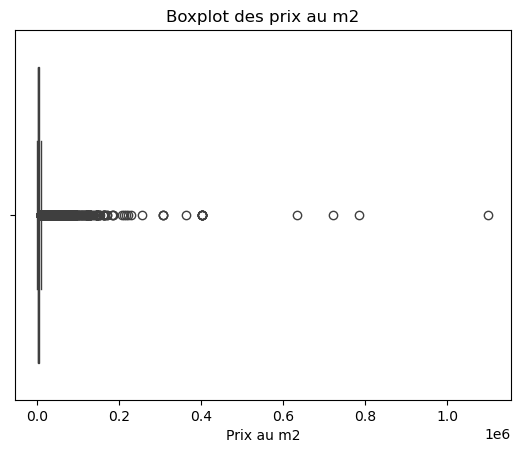

In [217]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df_immo['Prix_m2'])
plt.title("Boxplot des prix au m2")
plt.xlabel("Prix au m2")
plt.show();

In [218]:
# remplacer les valeurs aberrantes
Q1 = df_immo['Prix_m2'].quantile(0.25)
Q3 = df_immo['Prix_m2'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

df_immo.loc[df_immo['Prix_m2'] > upper_bound, 'Prix_m2'] = median_prixm2
df_immo.loc[df_immo['Prix_m2'] < lower_bound, 'Prix_m2'] = median_prixm2

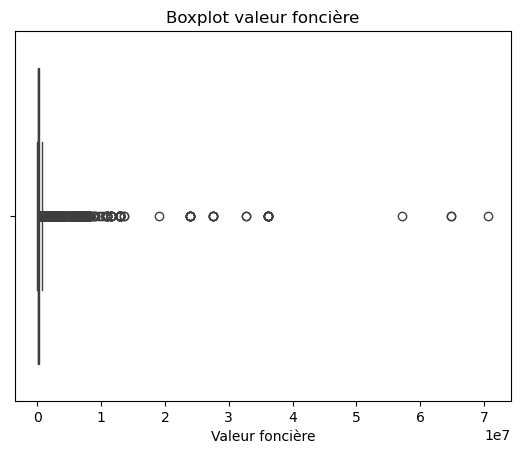

In [219]:

sns.boxplot(x=df_immo['Valeur_fonciere'])
plt.title("Boxplot valeur foncière")
plt.xlabel("Valeur foncière")
plt.show();

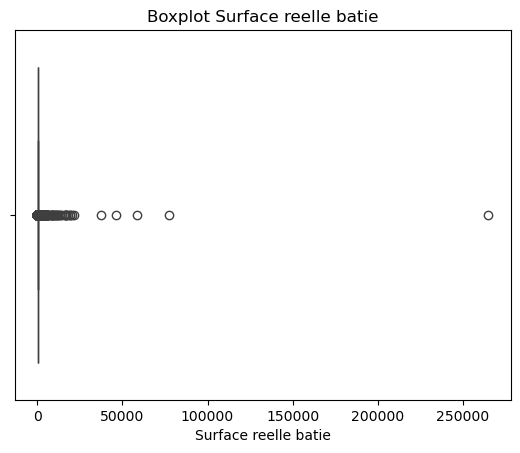

In [220]:
sns.boxplot(x=df_immo['Surface_reelle_bati'])
plt.title("Boxplot Surface reelle batie")
plt.xlabel("Surface reelle batie")
plt.show();

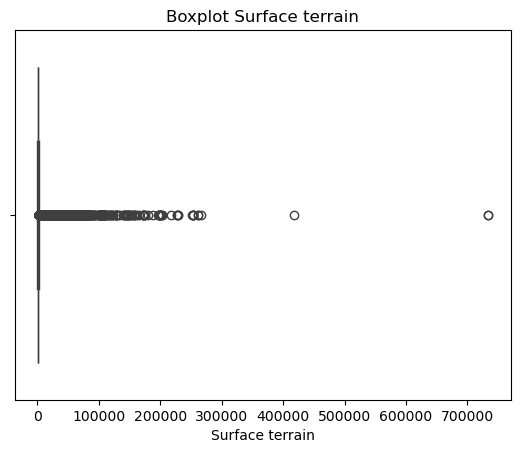

In [221]:
sns.boxplot(x=df_immo['Surface_terrain'])
plt.title("Boxplot Surface terrain")
plt.xlabel("Surface terrain")
plt.show();

# 4. Description des données (visualisations)

In [222]:
# description des données
df_immo.describe()

,index,Date_mutation,Annee,Code_commune,Valeur_fonciere,Surface_reelle_bati,Nombre_pieces_principales,Surface_terrain,Nombre_de_lots,Prix_m2
count,100169.000000,100169,100169.000000,100169.000000,1.001690e+05,100169.000000,100169.000000,100169.000000,100169.000000,100169.000000
mean,56764.409917,2023-03-07 20:42:51.094849536,2022.713913,211.955944,2.630909e+05,107.001907,2.062245,1873.721950,0.310615,2262.794995
min,0.000000,2022-01-03 00:00:00,2022.000000,1.000000,1.000000e+00,1.000000,0.000000,1.000000,0.000000,1.000000
25%,28077.000000,2022-07-21 00:00:00,2022.000000,89.000000,4.000000e+04,90.000000,2.000000,305.000000,0.000000,567.556000
50%,56879.000000,2023-02-23 00:00:00,2023.000000,202.000000,1.640000e+05,90.000000,2.000000,620.000000,0.000000,1869.616000
75%,85313.000000,2023-10-13 00:00:00,2023.000000,322.000000,3.100000e+05,90.000000,2.000000,1076.000000,0.000000,3206.328000
max,113965.000000,2024-06-29 00:00:00,2024.000000,457.000000,7.065918e+07,265000.000000,14.000000,734066.000000,55.000000,11891.892000
std,33002.661557,NaN,0.727336,133.805432,8.068837e+05,947.381489,1.467178,7713.576143,0.716180,2108.110730


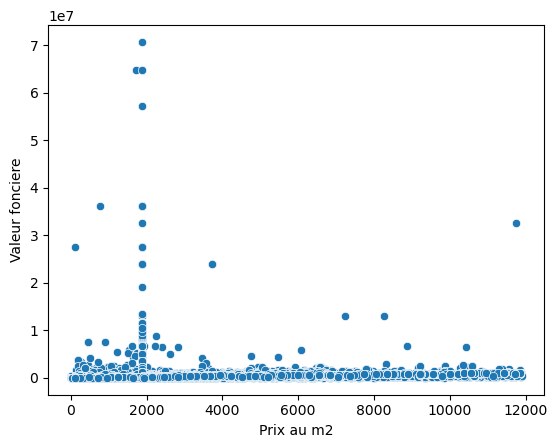

In [223]:
sns.scatterplot(data=df_immo, x="Prix_m2", y="Valeur_fonciere")
plt.xlabel("Prix au m2")
plt.ylabel("Valeur fonciere")
plt.show;

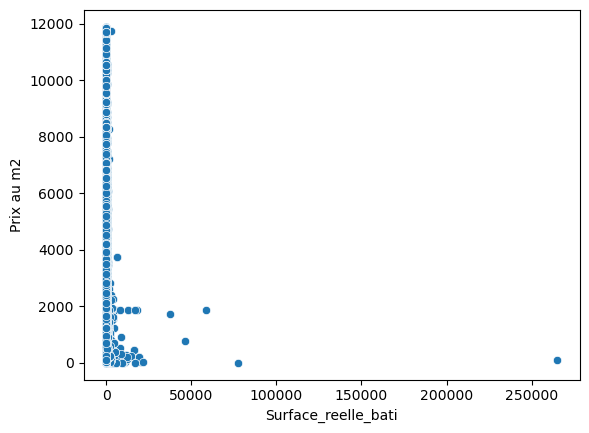

In [224]:
sns.scatterplot(data=df_immo, x="Surface_reelle_bati", y="Prix_m2")
plt.xlabel("Surface_reelle_bati")
plt.ylabel("Prix au m2")
plt.show;

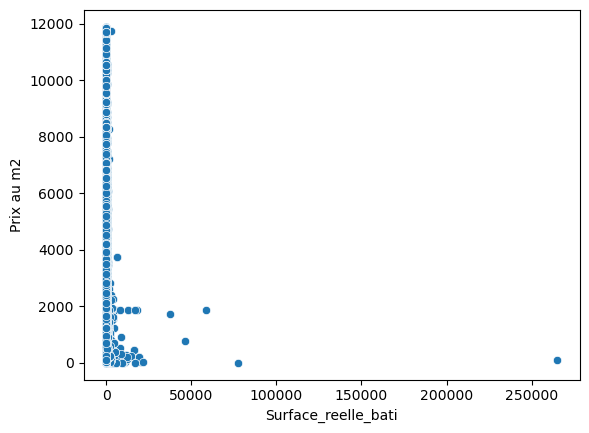

In [225]:
sns.scatterplot(data=df_immo, x="Surface_reelle_bati", y="Prix_m2")
plt.xlabel("Surface_reelle_bati")
plt.ylabel("Prix au m2")
plt.show;

In [232]:
df_immo.columns

Index(['Date_mutation', 'Annee', 'Commune', 'Code_postal', 'Code_commune',
       'Valeur_fonciere', 'Nature_mutation', 'Type_local',
       'Surface_reelle_bati', 'Nature_culture', 'Nombre_pieces_principales',
       'Surface_terrain', 'Nombre_de_lots', 'Prix_m2', 'Categorie mutation'],
      dtype='object')

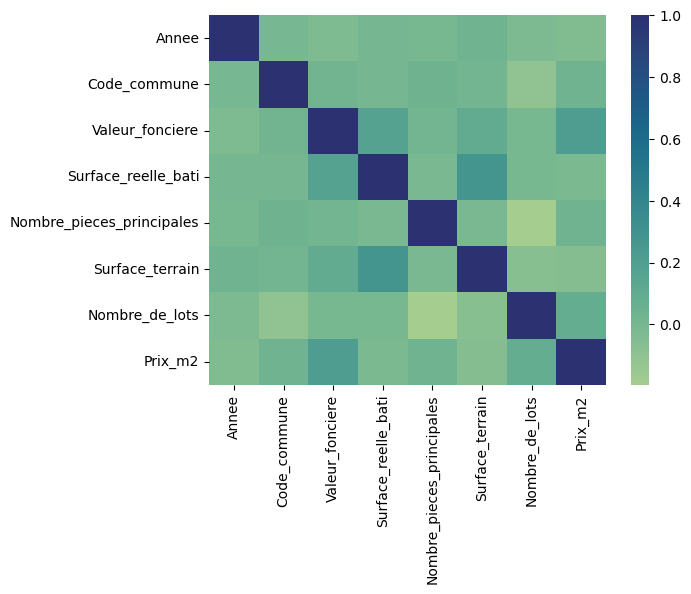

In [233]:
# corrélation entre les variables

matrix_cor = df_immo.select_dtypes(include=['number']).corr()
sns.heatmap(matrix_cor, cmap="crest")
plt.show();

In [234]:
df_immo.shape

(100169, 15)

In [235]:
df_immo.to_csv("df_immo_ain.csv")